In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
# Assuming the file is in the same directory as your notebook
file_path = '/content/drive/MyDrive/ColabNotebooks/household_power_consumption.txt'
df = pd.read_csv(file_path, sep=';', parse_dates=[['Date', 'Time']],
                 infer_datetime_format=True, low_memory=False)
df.head()

<ipython-input-6-3886c344b732>:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, sep=';', parse_dates=[['Date', 'Time']],
<ipython-input-6-3886c344b732>:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep=';', parse_dates=[['Date', 'Time']],
<ipython-input-6-3886c344b732>:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, sep=';', parse_dates=[['Date', 'Time']],


,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [7]:

# Step 2: Data Cleaning
# Rename the combined datetime column
df.rename(columns={'Date_Time': 'datetime'}, inplace=True)

# Replace missing values represented by '?' with NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Drop the 'Global_intensity' column
df.drop(columns=['Global_intensity'], inplace=True)

# Convert numerical columns to float
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
df[numeric_columns] = df[numeric_columns].astype(float)

# Extract Weekday and Weekend information
df['day_of_week'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Step 3: Descriptive Statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
                            datetime  Global_active_power  \
count                        2049280         2.049280e+06   
mean   2008-12-02 00:59:44.397740544         1.091615e+00   
min              2006-12-16 17:24:00         7.600000e-02   
25%              2007-12-10 05:37:45         3.080000e-01   
50%              2008-11-30 01:22:30         6.020000e-01   
75%              2009-11-23 20:31:15         1.528000e+00   
max              2010-11-26 21:02:00         1.112200e+01   
std                              NaN         1.057294e+00   

       Global_reactive_power       Voltage  Sub_metering_1  Sub_metering_2  \
count           2.049280e+06  2.049280e+06    2.049280e+06    2.049280e+06   
mean            1.237145e-01  2.408399e+02    1.121923e+00    1.298520e+00   
min             0.000000e+00  2.232000e+02    0.000000e+00    0.000000e+00   
25%             4.800000e-02  2.389900e+02    0.000000e+00    0.000000e+00   
50%             1.000000e-01  2.410100e+

# Hypothesis:
# H0: Global_active_power is the same on weekdays and weekends.
# H1: Global_active_power differs between weekdays and weekends.

In [9]:
weekday_data = df[df['is_weekend'] == 0]['Global_active_power']
weekend_data = df[df['is_weekend'] == 1]['Global_active_power']
from scipy import stats

# Perform Independent T-test
t_statistic, p_value = stats.ttest_ind(weekday_data, weekend_data, equal_var=False)

# Display Results
print("\nHypothesis Testing Results:")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")


alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis (Significant difference in power consumption).")
else:
    print("Result: Fail to reject the null hypothesis (No significant difference in power consumption).")



Hypothesis Testing Results:
T-Statistic: -111.5779
P-Value: 0.0000
Result: Reject the null hypothesis (Significant difference in power consumption).


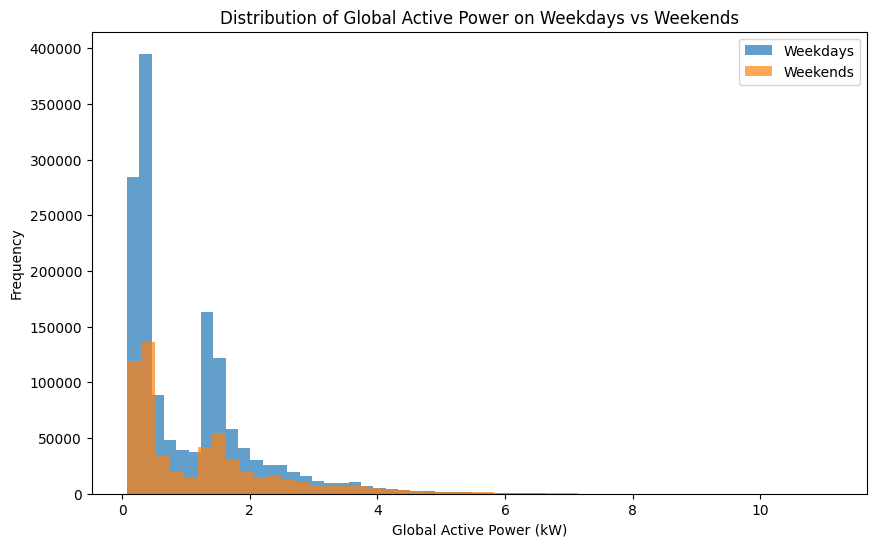

In [ ]:
import matplotlib.pyplot as plt

# Step 5: Visualize the Distribution
plt.figure(figsize=(10, 6))
plt.hist(weekday_data, bins=50, alpha=0.7, label='Weekdays')
plt.hist(weekend_data, bins=50, alpha=0.7, label='Weekends')
plt.title("Distribution of Global Active Power on Weekdays vs Weekends")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
print("Weekday Consumption Statistics:")
print(weekday_data.describe())
print("\nWeekend Consumption Statistics:")
print(weekend_data.describe())


Weekday Consumption Statistics:
count    1.470428e+06
mean     1.035472e+00
std      9.872890e-01
min      7.600000e-02
25%      3.040000e-01
50%      5.580000e-01
75%      1.478000e+00
max      9.732000e+00
Name: Global_active_power, dtype: float64

Weekend Consumption Statistics:
count    578852.000000
mean          1.234232
std           1.205453
min           0.078000
25%           0.322000
50%           0.736000
75%           1.706000
max          11.122000
Name: Global_active_power, dtype: float64


<ipython-input-17-f5a648f2b09b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_weekend', y='Global_active_power', data=df,


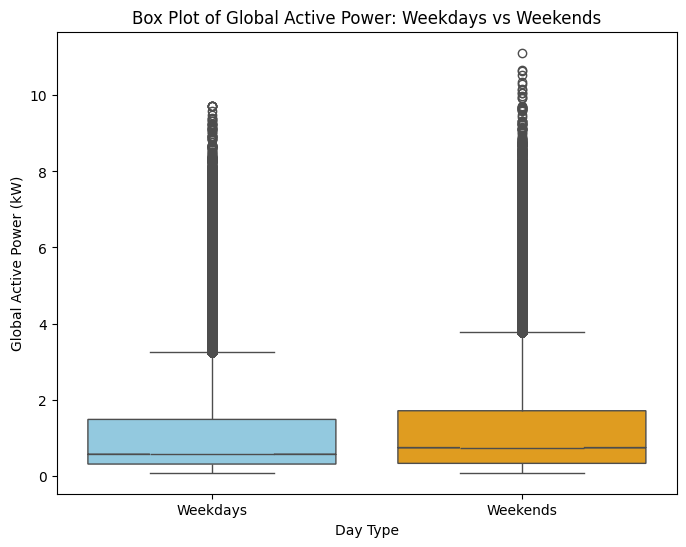

In [ ]:
import seaborn as sns

#Box plot for Weekdays vs Weekends
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='Global_active_power', data=df,
            palette=['skyblue', 'orange'], notch=True)
plt.xticks([0, 1], ['Weekdays', 'Weekends'])
plt.title("Box Plot of Global Active Power: Weekdays vs Weekends")
plt.xlabel("Day Type")
plt.ylabel("Global Active Power (kW)")
plt.show()

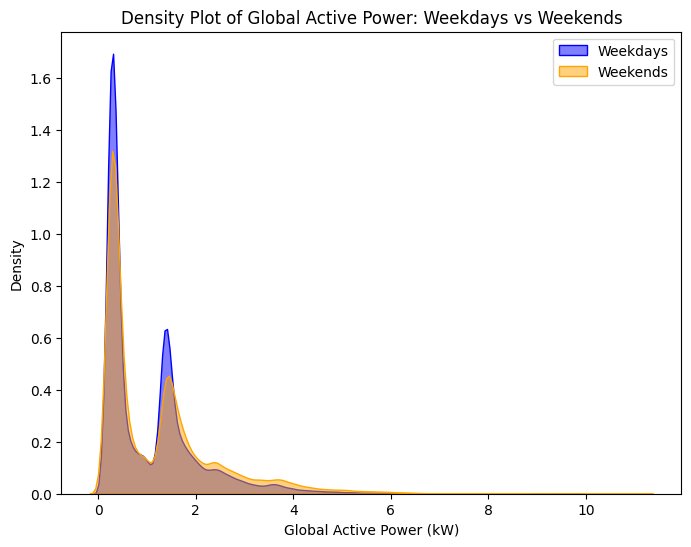

In [ ]:
# Step 2: KDE Plot for Weekdays vs Weekends
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['is_weekend'] == 0]['Global_active_power'], label='Weekdays', fill=True, color='blue', alpha=0.5)
sns.kdeplot(df[df['is_weekend'] == 1]['Global_active_power'], label='Weekends', fill=True, color='orange', alpha=0.5)
plt.title("Density Plot of Global Active Power: Weekdays vs Weekends")
plt.xlabel("Global Active Power (kW)")
plt.ylabel("Density")
plt.legend()
plt.show()

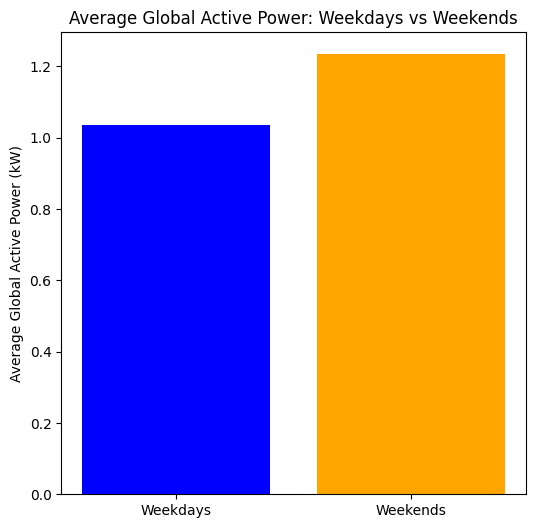

In [10]:
# Step 3: Bar Plot for Average Global Active Power
mean_weekday = df[df['is_weekend'] == 0]['Global_active_power'].mean()
mean_weekend = df[df['is_weekend'] == 1]['Global_active_power'].mean()

plt.figure(figsize=(6, 6))
plt.bar(['Weekdays', 'Weekends'], [mean_weekday, mean_weekend], color=['blue', 'orange'])
plt.title("Average Global Active Power: Weekdays vs Weekends")
plt.ylabel("Average Global Active Power (kW)")
plt.show()